In [19]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install dlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install face_recognition

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
import cv2
%matplotlib inline

In [43]:
image = cv2.imread("mark.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image,orientations=9,pixels_per_cell=(16,16),cells_per_block=(1, 1),block_norm='L2-Hys',visualize=True,
    transform_sqrt=False,
    feature_vector=True,
    multichannel=None)

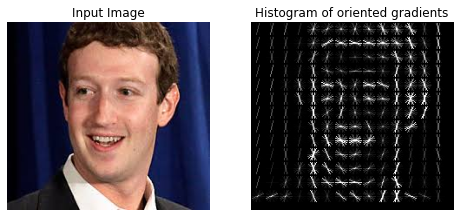

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
ax1.axis("off")
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title("Input Image")


#rescale histogram
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis("off")
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title("Histogram of oriented gradients")
plt.show()

In [45]:
image.shape

(216, 234, 3)

In [46]:
len(fd)

1638

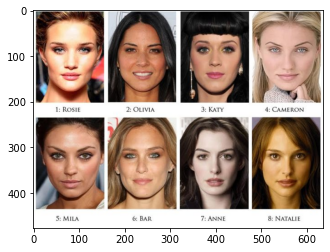

In [47]:
image = cv2.imread("combined.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [48]:
face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print(number_of_faces)

8


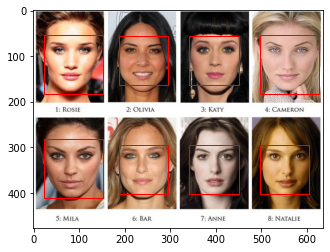

In [49]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations :
    top, right, bottom, left  = face_location
    x, y, w, h = left, top, right, bottom
    rect = Rectangle((x, y), w-x, h-y, fill=False, color="red")
    ax.add_patch(rect)
    
plt.show()

## face_recognition

In [31]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [38]:
image = cv2.imread("apj.jpg")
apj = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread("donald.jpg")
justin = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread("mark.jpg")
mark = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread("justin.jpg")
donald = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [39]:
apj_encoding = face_recognition.face_encodings(apj)[0]

justin_encoding = face_recognition.face_encodings(justin)[0]

mark_encoding = face_recognition.face_encodings(mark)[0]

donald_encoding = face_recognition.face_encodings(donald)[0]

known_face_encodings = [
    apj_encoding, justin_encoding, mark_encoding, donald_encoding
] 

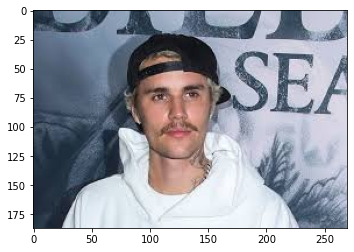

In [40]:
image = cv2.imread("justin_sample.jpg")
unknown = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(unknown)

unknown_encodings = face_recognition.face_encodings(unknown)

In [42]:
from scipy.spatial import distance

for unknown_encoding in unknown_encodings :
    results = []
    for known_face_encoding in known_face_encodings :
        d = distance.euclidean(known_face_encoding, unknown_encoding)
        results.append(d)
    threshold = 0.6
    results = np.array(results)<=threshold
    
    name = "Unknown"
    
    if results[0]:
        name = "Dr. Apj Abdul Kalam"
    elif results[1]:
        name = "Justin Bieber"
    elif results[2]:
        name = "Mark Zuckerberg"
    elif results[3]:
        name = "Donald Trump"
        
    print(f"Hi! {name}")

Hi! Justin Bieber
